In [1]:
""" 
WIP Jupyter Notebook for EISy as Py Functions
To be used for testing, documentation, and for running code snippets as needed


RESERVING Variables:

t_data: Data that is in the TIME space (AKA: Raw data, Actual measurements)
        Will probably consist of [Time, Voltage, Current] _UseCase: Homebrewed data measurements)_

f_data: Data that is in the FREQUENCY space (AKA: The calculated Resistance-metrics at each Frequency)
        Will probably consist of [Freq, Real-Res, Imag-Res, Total-Res, and Phase-Angle] _(UseCase: Common Equip Out)_





"""

' \nWIP Jupyter Notebook for EISy as Py Functions\nTo be used for testing, documentation, and for running code snippets as needed\n\n\nRESERVING Variables:\n\nt_data: Data that is in the TIME space (AKA: Raw data, Actual measurements)\n        Will probably consist of [Time, Voltage, Current] _UseCase: Homebrewed data measurements)_\n\nf_data: Data that is in the FREQUENCY space (AKA: The calculated Resistance-metrics at each Frequency)\n        Will probably consist of [Freq, Real-Res, Imag-Res, Total-Res, and Phase-Angle] _(UseCase: Common Equip Out)_\n\n\n\n\n\n'

In [2]:
import numpy as np
import pandas as pd
import sqlalchemy
import os
    
the_dir=os.getcwd()
csv_file=the_dir+'\\Save_test.csv'
pkl_file=the_dir+'\\Save_test.pkl'
#sql_file=the_dir+'\\:Sqlite_test:' # ??? I don't know what I'm doing yet
engine = sqlalchemy.create_engine('sqlite:///:memory:',echo=True)


In [4]:
""" Playing with SQL Alchemy (and SQLite? )"""

d1=pd.DataFrame(data=[1,2,3,4,5])
d2=pd.DataFrame(data=[0,2,4,6,8])
data=pd.DataFrame({"ID":['20200101a','20200201a'], "rawdata":[d1,d2]})
data['rawdata'][0][0][2]

#data.to_sql('')

3

In [5]:
data.to_pickle(pkl_file)
#data.to_sql('data_testing',con=engine,if_exists='replace')

2020-02-19 17:40:32,974 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-02-19 17:40:32,974 INFO sqlalchemy.engine.base.Engine ()
2020-02-19 17:40:32,974 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-02-19 17:40:32,974 INFO sqlalchemy.engine.base.Engine ()
2020-02-19 17:40:32,974 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("data_testing")
2020-02-19 17:40:32,974 INFO sqlalchemy.engine.base.Engine ()
2020-02-19 17:40:32,990 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE data_testing (
	"index" BIGINT, 
	"ID" TEXT, 
	rawdata TEXT
)


2020-02-19 17:40:32,990 INFO sqlalchemy.engine.base.Engine ()
2020-02-19 17:40:32,990 INFO sqlalchemy.engine.base.Engine COMMIT
2020-02-19 17:40:32,990 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_data_testing_index ON data_testing ("index")
2020-02-19 17:40:32,990 INFO sqlalchemy.engine.base.Engine ()
2020-02-19 17:40:33,005 INFO sqlalch

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 2 - probably unsupported type. [SQL: 'INSERT INTO data_testing ("index", "ID", rawdata) VALUES (?, ?, ?)'] [parameters: ((0, '20200101a',    0
0  1
1  2
2  3
3  4
4  5), (1, '20200201a',    0
0  0
1  2
2  4
3  6
4  8))] (Background on this error at: http://sqlalche.me/e/rvf5)

In [21]:

pandas_reading=pd.read_pickle(pkl_file)
#print(pandas_reading.head())
#print(data.head())

In [75]:
hard_file="C:/Users/conta/Documents/Py/DIRECT/Group_Project/EISy-as-Py/data/EX_Carbon-Ni NPs.txt"
local_file="data/EX_Carbon-Ni NPs.txt"
URL="https://drive.google.com/open?id=1WiN0EHduF6X3I6RJJtd9ND0t_EibNirA"
biologic_file="C:/Users/conta/Documents/Py/DIRECT/Group_Project/EISy-as-Py/data/0strain_eis_2_C01a_Biologic.txt"

def import_f_data(file):
    '''
    Given a filename (either local or from Root), uploads with read_csv. 
    Loops through initial header rows until we agree that the Data has started. 
        (TO-DO: MAKE THIS SMARTER! consider config options and/or some user interaction)
    Reads Data into a pandas dataframe, returns said. 
        (Return anything else?)
        (To-Do: Depending on the data source, unify column names to UNIVERSAL list. Smartly?!?)
        (To-Do: Examine and convert UNITS to a UNIVERSAL standard. )
        (To-Do: Should take a look at the headers for possible MetaData? Maybe save common files in some config?)
    '''
    freq_str=("Frequency","frequency","FREQUENCY","Freq","freq","FREQ","F","f")
    sep_str=("/","\\","_","[","(")
    hz_str=("Hz","HZ","hz")
    
    all_fstrings=[]
    for f in freq_str:
        for s in sep_str:
             for h in hz_str:
                 all_fstrings.append(f+s+h)
    #print(all_fstrings)
    
    h=0
    while h<=100: #Use Header ID as the loop (will search for header length)
        #print(h)
        raw_heads=pd.read_csv(file,sep=None,header=h,nrows=1,engine='python') #Read one row at a time
        for f_string in all_fstrings:
            if f_string in raw_heads.columns:
                print("Found F-String: '" +f_string+"'    At Header= "+str(h)+" Lines")
                raw=pd.read_csv(file,sep=None,header=h,nrows=None,engine='python')
                h=1000 #Stop trying to read it
                break
            else:
                continue
        h=h+1
    print(raw.head())
    return raw

In [83]:
print("Importing as Hard-Coded:")
import_f_data(hard_file)
print(" ")
print("Importing from Biologic:")
biologic_f_data=import_f_data(biologic_file)

'''
##WIP - Download Google Drive Interface? MAYBE OR MAYBE NOT USEFUL TO CODE. 
#NOTE: Victor/MattMurb. used OSF (OpenSourceFramework) for data! Look into that?!?
print("Importing as URL:")
import_data(URL)
print("Done!")
'''

experiments=pd.DataFrame(data={"id":["20200110a","20190216a"],
                               "raw_f_data":[import_f_data,biologic_f_data],
                               "cell_area_cm2":[22.005,19.44],
                               "electrode_mass_g":[6.34,8.99],
                               "calc_intercept_Ohm-cm2":[100.32,118.2],
                               "calc_capacitance_uF":[10.2,22.1],
                               "...": ["...","..."]
                              })
print("DataFrame:           Raw Data               MetaData                 Calculated Data")
#print(experiments.head())
#print(experiments.raw_f_data[1].head())


Importing as Hard-Coded:
Found F-String: 'Freq/Hz'    At Header= 14 Lines
   Freq/Hz   Z'/ohm   Z"/ohm   Z/ohm   Phase/deg
0  82520.0    8.168   -2.547   8.556       -17.3
1  68120.0    8.463   -2.805   8.916       -18.3
2  56250.0    8.790   -3.066   9.309       -19.2
3  46440.0    9.150   -3.350   9.744       -20.1
4  38330.0    9.536   -3.644  10.210       -20.9
 
Importing from Biologic:
Found F-String: 'freq/Hz'    At Header= 0 Lines
      freq/Hz  Re(Z)/Ohm  -Im(Z)/Ohm    |Z|/Ohm  Phase(Z)/deg  cycle number  \
0  1000019.30  26912.764   41673.941  49608.609    -57.145885           1.0   
1   794326.00  34708.629   43036.020  55288.227    -51.113762           1.0   
2   630956.88  42002.879   42982.336  60097.613    -45.660305           1.0   
3   501191.31  48298.195   43533.727  65022.313    -42.030018           1.0   
4   398105.38  54107.363   43938.230  69700.609    -39.078545           1.0   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4 

TypeError: 'function' object is not subscriptable

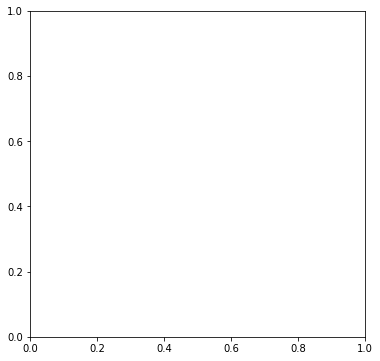

In [78]:

import matplotlib.pyplot as plt
#%matplotlib inline
def PlotNyquist(f_data,the_ax=None,the_title='Nyquist Comparison'):
    '''
    Takes in data and produces a well formatted Nyquist plot. return fig,ax so users can continue to manipulate plot as needed
    QUESTION: HOW DO YOU TAKE OPTIONAL INPUTS? I think I got it working above?
    '''
    fig,ax=plt.subplots(figsize=[6,6])
    
    ax.plot(f_data["Z'/ohm"],-f_data['Z"/ohm'],'*-r')
    
    range_limit=max(max(f_data["Z'/ohm"])-min(f_data["Z'/ohm"]),max(-f_data['Z"/ohm'])-min(-f_data['Z"/ohm']))
    real_lims=[min(f_data["Z'/ohm"]),min(f_data["Z'/ohm"])+range_limit]
    imag_lims=[min(-f_data['Z"/ohm']),min(-f_data['Z"/ohm'])+range_limit]
    
    print([real_lims,imag_lims])
    ax.set_xlim=real_lims
    ax.set_ylim=imag_lims
    ax.set_title=the_title
    ax.set_xlabel="Z' (Real Ohmic)"
    ax.set_xlabel='-Z" (Imag Ohmic)'
    
    plt.show()
    return fig,ax
    
#fig,ax=plt.subplots(figsize=[6,6])
fig,ax=PlotNyquist(import_f_data)